In [267]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

def remove_categorical_columns(df):
    df.drop('MSZoning',axis=1,inplace=True)
    df.drop('Street',axis=1,inplace=True)
    df.drop('Alley',axis=1,inplace=True)
    df.drop('LotShape',axis=1,inplace=True)
    df.drop('LandContour',axis=1,inplace=True)
    df.drop('Utilities',axis=1,inplace=True)
    df.drop('LotConfig',axis=1,inplace=True)
    df.drop('LandSlope',axis=1,inplace=True)
    df.drop('Neighborhood',axis=1,inplace=True)
    df.drop('Condition1',axis=1,inplace=True)
    df.drop('Condition2',axis=1,inplace=True)
    df.drop('BldgType',axis=1,inplace=True)
    df.drop('HouseStyle',axis=1,inplace=True)
    df.drop('RoofStyle',axis=1,inplace=True)
    df.drop('RoofMatl',axis=1,inplace=True)
    df.drop('Exterior1st',axis=1,inplace=True)
    df.drop('Exterior2nd',axis=1,inplace=True)
    df.drop('MasVnrType',axis=1,inplace=True)
    df.drop('ExterQual',axis=1,inplace=True)
    df.drop('ExterCond',axis=1,inplace=True)
    df.drop('Foundation',axis=1,inplace=True)
    df.drop('BsmtQual',axis=1,inplace=True)
    df.drop('BsmtCond',axis=1,inplace=True)
    df.drop('BsmtExposure',axis=1,inplace=True)
    df.drop('BsmtFinType1',axis=1,inplace=True)
    df.drop('BsmtFinType2',axis=1,inplace=True)
    df.drop('Heating',axis=1,inplace=True)
    df.drop('HeatingQC',axis=1,inplace=True)
    df.drop('CentralAir',axis=1,inplace=True)
    df.drop('Electrical',axis=1,inplace=True)
    df.drop('KitchenQual',axis=1,inplace=True)
    df.drop('Functional',axis=1,inplace=True)
    df.drop('FireplaceQu',axis=1,inplace=True)
    df.drop('GarageType',axis=1,inplace=True)
    df.drop('GarageFinish',axis=1,inplace=True)
    df.drop('GarageQual',axis=1,inplace=True)
    df.drop('GarageCond',axis=1,inplace=True)
    df.drop('PavedDrive',axis=1,inplace=True)
    df.drop('PoolQC',axis=1,inplace=True)
    df.drop('Fence',axis=1,inplace=True)
    df.drop('MiscFeature',axis=1,inplace=True)
    df.drop('SaleType',axis=1,inplace=True)
    df.drop('SaleCondition',axis=1,inplace=True)

def input_missing_value(df):
    
    
    #LotFrontage - insert the mean 
    imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
    #print(np.shape(df['LotFrontage']))
    aux = imp.fit_transform(df['LotFrontage']).transpose()    
    #print(np.shape(aux))
    df['LotFrontage'] = aux
    #print(df['LotFrontage'])

    #Alley
    df.Alley.fillna(inplace=True,value='No')

    #MasVnrType - remove the records where the value is NA
    #print("Number of lines where MasVnrType has Nan value", len(df[df['MasVnrType'].isnull()]))
    df.dropna(axis=0,subset=['MasVnrType'],inplace=True)
    #print("Number of lines where MasVnrType has Nan value",len(df[df['MasVnrType'].isnull()]))

    #MasVnrArea - remove the hole column
    df.drop('MasVnrArea',axis=1,inplace=True)
    
    #Condition2 - remove the hole column Possui quantidade de tipos diferentes na base de treino e teste e apenas 
    #um dos tipos é relevante    
    df.drop('Condition2',axis=1,inplace=True)
    
    #RoofMatl - remove the hole column Possui quantidade de tipos diferentes na base de treino e teste e apenas 
    #um dos tipos é relevante    
    df.drop('RoofMatl',axis=1,inplace=True)
    

    #MsZoning   - tem NA apenas na base de teste  
    df.dropna(axis=0,subset=['MSZoning'],inplace=True)
    
    #BsmtQual
    df.BsmtQual.fillna(inplace=True,value='No')
    
    #HouseStyle - Esse valor so existe na base de treino. Ao inves de remover toda coluna removo somente as linhas 
    df.drop(df[df.HouseStyle=='2.5Fin'].index,inplace=True)
    
    #BsmtCond
    df.BsmtCond.fillna(inplace=True,value='No')

    #BsmtExposure
    df.BsmtExposure.fillna(inplace=True,value='No')

    #BsmtFinType1
    df.BsmtFinType1.fillna(inplace=True,value='No')

    #BsmtFinType2
    df.BsmtFinType2.fillna(inplace=True,value='No')

    #Electrical - remove the records where the value is NA
    #print("Number of lines where Electrical has Nan value",len(df[df['Electrical'].isnull()]))
    df.dropna(axis=0,subset=['Electrical'],inplace=True)
    df.drop(df[df.Electrical=='Mix'].index,inplace=True)
    #print("Number of lines where Electrical has Nan value",len(df[df['Electrical'].isnull()]))

    #FireplaceQu
    df.FireplaceQu.fillna(inplace=True,value='No')

    #GarageType
    df.GarageType.fillna(inplace=True,value='No')

    #GarageYrBlt - remove the hole column
    df.drop('GarageYrBlt',axis=1,inplace=True)

    #GarageFinish
    df.GarageFinish.fillna(inplace=True,value='No')

    #GarageQual - A base de teste nao tem um dos tipos presente na base de treino. Assim a base de treino terá uma 
    #feature para esse tipo e a de teste não. Alem disso, apenas um tipo é pertinente
    #Achei melhor entao excluir essa coluna    
    df.drop('GarageQual',axis=1,inplace=True)
    #df.drop(df[df.GarageQual=='Ex'].index,inplace=True)
    
    #GarageCond
    df.GarageCond.fillna(inplace=True,value='No')

    #PoolQC
    #df.PoolQC.fillna(inplace=True,value='No')
    df.drop('PoolQC',axis=1,inplace=True)
    
    #Fence
    df.Fence.fillna(inplace=True,value='No')

    #MiscFeature
    #df.MiscFeature.fillna(inplace=True,value='No')
    df.drop('MiscFeature',axis=1,inplace=True)

    #MiscVal
    df.drop('MiscVal',axis=1,inplace=True)
    
    #SaleType
    df.drop('SaleType',axis=1,inplace=True)
    
    #Exterior1st
    df.dropna(axis=0,subset=['Exterior1st'],inplace=True)
    df.drop(df[df.Exterior1st=='Stone'].index,inplace=True)
    df.drop(df[df.Exterior1st=='ImStucc'].index,inplace=True)
    df.drop(df[df.Exterior1st=='CBlock'].index,inplace=True)

    #Exterior2nd
    df.dropna(axis=0,subset=['Exterior2nd'],inplace=True)
    df.drop(df[df.Exterior2nd=='Other'].index,inplace=True)
    df.drop(df[df.Exterior2nd=='CBlock'].index,inplace=True)
    
    #Heating
    df.drop(df[df.Heating=='OthW'].index,inplace=True)
    df.drop(df[df.Heating=='Floor'].index,inplace=True)
    
    #KitchenQual
    df.dropna(axis=0,subset=['KitchenQual'],inplace=True)
    
    #Functional
    df.dropna(axis=0,subset=['Functional'],inplace=True)
    
    #Utilities
    df.drop('Utilities',axis=1,inplace=True)
    
    #BsmtFinSF1
    df.dropna(axis=0,subset=['BsmtFinSF1'],inplace=True)
    
    #BsmtFinSF2
    df.dropna(axis=0,subset=['BsmtFinSF2'],inplace=True)
    
    #BsmtUnfSF
    df.dropna(axis=0,subset=['BsmtUnfSF'],inplace=True)
    
    #TotalBsmtSF
    df.dropna(axis=0,subset=['TotalBsmtSF'],inplace=True)
    
    #BsmtFullBath
    df.dropna(axis=0,subset=['BsmtFullBath'],inplace=True)
    
    #BsmtHalfBath
    df.dropna(axis=0,subset=['BsmtHalfBath'],inplace=True)
    
    #GarageCars
    df.dropna(axis=0,subset=['GarageCars'],inplace=True)
    
    #GarageArea
    df.dropna(axis=0,subset=['GarageArea'],inplace=True)
    
df = pd.read_csv("train.csv",na_values=['?','NA'],delimiter=',',delim_whitespace=False)
df_test = pd.read_csv("test.csv",na_values=['?','NA'],delimiter=',',delim_whitespace=False)

print(df.shape)
print(df_test.shape)
#print(df.head())
#print(df.describe)
#print(df.dtypes)
#df = df.dropna()


from sklearn.preprocessing import Imputer

########################Dealing with missing values

#missing data
# total = df.isnull().sum().sort_values(ascending=False)
# percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# print(missing_data.head(20))

# 
#               Total   Percent
# PoolQC         1453  0.995205
# MiscFeature    1406  0.963014
# Alley          1369  0.937671
# Fence          1179  0.807534
# FireplaceQu     690  0.472603
# LotFrontage     259  0.177397
# GarageCond       81  0.055479
# GarageType       81  0.055479
# GarageYrBlt      81  0.055479
# GarageFinish     81  0.055479
# GarageQual       81  0.055479
# BsmtExposure     38  0.026027
# BsmtFinType2     38  0.026027
# BsmtFinType1     37  0.025342
# BsmtCond         37  0.025342
# BsmtQual         37  0.025342
# MasVnrArea        8  0.005479
# MasVnrType        8  0.005479
# Electrical        1  0.000685
# Utilities         0  0.000000



#print(df.columns[df.isnull().any()])
#'LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
#       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
#       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
#       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
#       'MiscFeature'
input_missing_value(df)


#print(df_test.columns[df_test.isnull().any()])
#Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
#       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
#       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
#      'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
#       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
#      'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
#       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
#       'SaleType'],

input_missing_value(df_test)

print(df.shape)
print(df_test.shape)

########################End dealing with missing values

########################Tratando campos nominais

vec = DictVectorizer()
aux = np.asmatrix(vec.fit_transform(df.transpose().to_dict().values()).toarray())

#np.savetxt('testfile.csv', aux, delimiter=",")
#print((vec.feature_names_))
#print(np.shape(categorical_columns))
#print(categorical_columns)
data_train = pd.DataFrame(aux,columns=vec.feature_names_)

# The OneHotEncoder converts features represented as numeric codes (so they are values that can't be ordered) to their binary representation
#enc = preprocessing.OneHotEncoder() 
#aux = enc.fit_transform(data_train)

data_train.to_csv('train_no_categorical.csv')

print("New shape train:" , np.shape(data_train))
print("Indice da coluna SalePrice no novo dataset" , data_train.columns.get_loc('SalePrice'))



################################################# Base de teste


aux_test = vec.fit_transform(df_test.transpose().to_dict().values()).toarray()
data_test = pd.DataFrame(aux_test,columns=vec.feature_names_)
print("New shape test:" , np.shape(data_test))

data_test.to_csv('test_no_categorical.csv')


#print(data_test.columns.difference(data_train.columns))


(1460, 81)
(1459, 80)
(1434, 71)
(1432, 70)
New shape train: (1434, 249)
Indice da coluna SalePrice no novo dataset 239
New shape test: (1432, 248)


count      1434.000000
mean     180426.479777
std       78962.777094
min       34900.000000
25%      130000.000000
50%      162000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


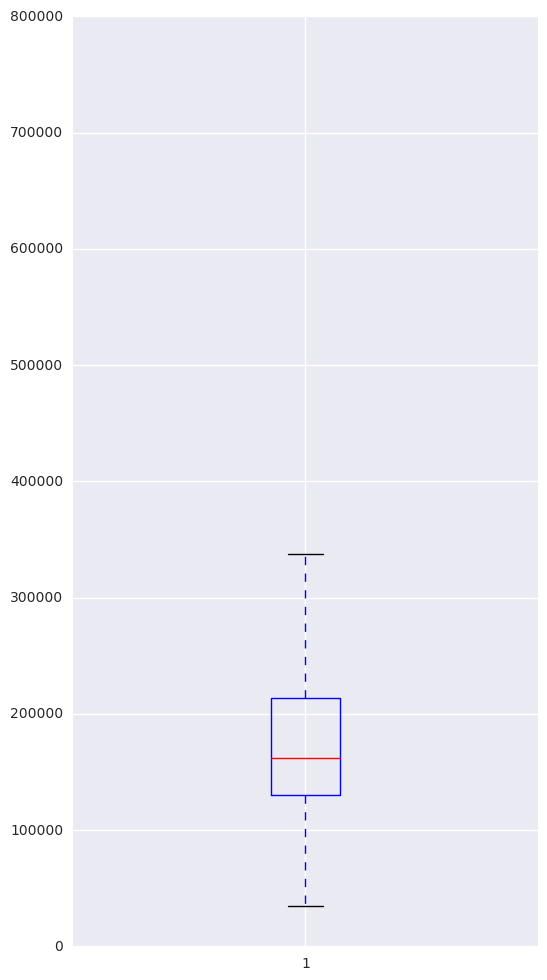

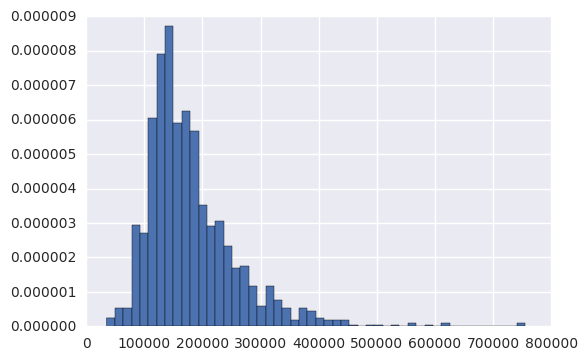

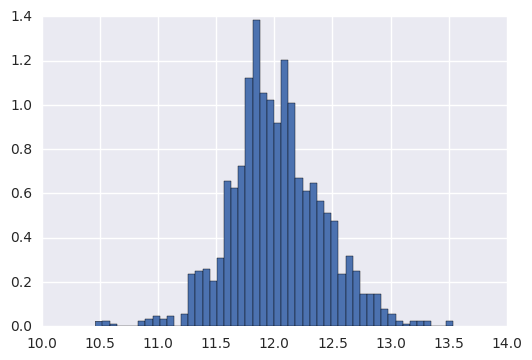

In [317]:
from scipy.stats import norm
from scipy import stats
import pylab as P

print(df.SalePrice.describe())

saleprice_scaled = preprocessing.StandardScaler().fit_transform((df['SalePrice'][:,np.newaxis]));
fig = plt.figure(1, figsize=(6, 12))
#ax = fig.add_subplot(111)
#ax.boxplot(saleprice_scaled)
plt.boxplot(saleprice_scaled)


# the histogram of the data with histtype='step'
plt.figure()
n, bins, patches = P.hist(df['SalePrice'], 50, normed=1, histtype='bar')
#P.setp(patches, 'facecolor', 'g', 'alpha', 0.75)
plt.figure()

saleprice_log = np.log(df['SalePrice'])
n, bins, patches = P.hist(saleprice_log, 50, normed=1, histtype='bar')
#P.setp(patches, 'facecolor', 'g', 'alpha', 0.75)

#df['SalePrice'] = np.log(df['SalePrice'])
#df_test['SalePrice'] = np.log(df_test['SalePrice'])

In [269]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df,name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name,x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)
    





In [270]:
print("\n Tentativa de selecionar melhores features \n")

from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel

#Removing features with low variance
#print("Original shape: {}".format(np.shape(df.iloc[:,0:-1])))
#sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
#features = sel.fit_transform(df.iloc[:,0:-1])
#print("Shape apos Removing features with low variance {}".format(np.shape(features))) #nenhuma foi selecionada 
#print("\n")

#Tree-based feature selection
y_train = (data_train['SalePrice'])
x_train = (data_train.drop('SalePrice',axis=1))

clf = ExtraTreesRegressor()
clf = clf.fit(x_train,y_train)
data = np.zeros((1,x_train.shape[1])) 
data = pd.DataFrame(data, columns=x_train.columns)
data.iloc[0] = clf.feature_importances_
print("As features selecionadas com Tree-based feature selection foram: \n")
print(data)

model = SelectFromModel(clf, prefit=True)
aux = model.transform(x_train)

print("\n New shape train apos Tree-based feature selection: {}".format(aux.shape))

print("\n Fim tentativa selecionar melhores features \n")


data_train_less_features = pd.concat([pd.DataFrame(aux),pd.DataFrame(y_train)],axis=1)
data_train_less_features.to_csv('data_train_less_features.csv')


aux = model.transform((data_test))
data_test_less_features = pd.DataFrame(aux)
print("\n New shape test apos Tree-based feature selection: {}".format(aux.shape))


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn   import metrics
from sklearn.model_selection import train_test_split


 Tentativa de selecionar melhores features 

As features selecionadas com Tree-based feature selection foram: 

   1stFlrSF  2ndFlrSF  3SsnPorch  Alley=Grvl  Alley=No  Alley=Pave  \
0  0.022795  0.012505   0.000822    0.000116  0.000203     0.00012   

   BedroomAbvGr  BldgType=1Fam  BldgType=2fmCon  BldgType=Duplex    ...     \
0      0.004423        0.00609         0.000054         0.000037    ...      

   SaleCondition=Partial  ScreenPorch  Street=Grvl  Street=Pave  TotRmsAbvGrd  \
0               0.002617      0.00058     0.000059     0.000006      0.018792   

   TotalBsmtSF  WoodDeckSF  YearBuilt  YearRemodAdd    YrSold  
0     0.011663    0.004067   0.006276      0.004707  0.002498  

[1 rows x 248 columns]

 New shape train apos Tree-based feature selection: (1434, 26)

 Fim tentativa selecionar melhores features 


 New shape test apos Tree-based feature selection: (1432, 26)


In [271]:
#Starting making predictors

from sklearn.linear_model import LinearRegression

#Caso 1 - Linear Regression 
print("Caso 1 - Linear Regression ")

# Shuffle
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)


#Normalization
y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = LinearRegression()
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# The mean squared error
#pred = classifier.predict(x_test_scaled)
#score = metrics.mean_squared_error(y_test, pred)
#print("Final, out of sample score (RMSE): {}".format(score))    

# Evaluate success using accuracy
#print("Final Accuracy: %.3f" % classifier.score(X=x_test_scaled,y=y_test))



###########Less features

print("\n\n")
#Normalization
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = LinearRegression()
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


Caso 1 - Linear Regression 
Fold #1
Fold score (RMSE): 612948287697184896.00
Accuracy: -52378750143351406202978304.000
Fold #2
Fold score (RMSE): 44765498864468120.00
Accuracy: -387864159450549373108224.000
Fold #3
Fold score (RMSE): 31103.40
Accuracy: 0.831
Fold #4
Fold score (RMSE): 385244532796836992.00
Accuracy: -28617801991073590910386176.000
Fold #5
Fold score (RMSE): 31252.10
Accuracy: 0.875

 Average RMSE: 3.244964699877873e+17



Fold #1
Fold score (RMSE): 24304.01
Accuracy: 0.888
Fold #2
Fold score (RMSE): 33742.18
Accuracy: 0.825
Fold #3
Fold score (RMSE): 33846.84
Accuracy: 0.850
Fold #4
Fold score (RMSE): 26085.47
Accuracy: 0.868
Fold #5
Fold score (RMSE): 44723.31
Accuracy: 0.691

 Average RMSE: 33323.72862212683


In [272]:
#Caso 3 - SVM
from sklearn.svm import SVR

print("SVM")

# Shuffle
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)

#Normalization
y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = SVR()
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# The mean squared error
#pred = classifier.predict(x_test_scaled)
#score = metrics.mean_squared_error(y_test, pred)
#print("Final, out of sample score (RMSE): {}".format(score))    

# Evaluate success using accuracy
#print("Final Accuracy: %.3f" % classifier.score(X=x_test_scaled,y=y_test))

###########Less features
print("\n\n")
#Normalization
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = SVR()
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


SVM
Fold #1
Fold score (RMSE): 77630.87
Accuracy: -0.076
Fold #2
Fold score (RMSE): 84548.34
Accuracy: -0.061
Fold #3
Fold score (RMSE): 87981.34
Accuracy: -0.055
Fold #4
Fold score (RMSE): 79127.73
Accuracy: -0.046
Fold #5
Fold score (RMSE): 74773.74
Accuracy: -0.029

 Average RMSE: 80958.45191826107



Fold #1
Fold score (RMSE): 75660.64
Accuracy: -0.081
Fold #2
Fold score (RMSE): 83073.32
Accuracy: -0.062
Fold #3
Fold score (RMSE): 89930.07
Accuracy: -0.061
Fold #4
Fold score (RMSE): 72259.95
Accuracy: -0.010
Fold #5
Fold score (RMSE): 83071.89
Accuracy: -0.067

 Average RMSE: 81036.29052635258


In [273]:
from sklearn.neural_network import MLPRegressor

# Shuffle
print("NN MLPRegressor")
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)


#Normalization
y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(18,4,2), random_state=1)
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# The mean squared error
#pred = classifier.predict(x_test_scaled)
#score = metrics.mean_squared_error(y_test, pred)
#print("Final, out of sample score (RMSE): {}".format(score))    

# Evaluate success using accuracy
#print("Final Accuracy: %.3f" % classifier.score(X=x_test_scaled,y=y_test))

###########Less features
print("\n\n")
#Normalization
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(18,4,2), random_state=1)
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


NN MLPRegressor
Fold #1
Fold score (RMSE): 72726.78
Accuracy: -0.001
Fold #2
Fold score (RMSE): 74112.06
Accuracy: -0.002
Fold #3
Fold score (RMSE): 83695.47
Accuracy: -0.001
Fold #4
Fold score (RMSE): 82719.20
Accuracy: -0.000
Fold #5
Fold score (RMSE): 80826.58
Accuracy: -0.000

 Average RMSE: 78944.37166827293



Fold #1
Fold score (RMSE): 32143.34
Accuracy: 0.805
Fold #2
Fold score (RMSE): 41365.28
Accuracy: 0.737
Fold #3
Fold score (RMSE): 43543.91
Accuracy: 0.751
Fold #4
Fold score (RMSE): 25472.95
Accuracy: 0.874
Fold #5
Fold score (RMSE): 46514.09
Accuracy: 0.666

 Average RMSE: 38601.65457212376


In [274]:
##Random Forests
from sklearn.ensemble import RandomForestRegressor

# Shuffle
print("Random Forests")
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(data_train.drop('SalePrice',axis=1), data_train['SalePrice'], test_size=0.20, random_state=42)

classifier = RandomForestRegressor(n_estimators=10)

classifier.fit(x_train, y_train)

# The mean squared error
pred = classifier.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Mean squared error: {}".format(score))
# Evaluate success using accuracy
print("Accuracy: %.3f" % classifier.score(X=x_test,y=y_test))
print("\n\n")


y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))


classifier = RandomForestRegressor(n_estimators=10)

kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train.as_matrix()[training]
    y_train_fold = y_train.as_matrix()[training]
    x_test_fold = x_train.as_matrix()[test]
    y_test_fold = y_train.as_matrix()[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): {}".format(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# The mean squared error
#pred = classifier.predict(x_test_scaled)
#score = metrics.mean_squared_error(y_test, pred)
#print("Final, out of sample score (RMSE): {}".format(score))    

# Evaluate success using accuracy
#print("Final Accuracy: %.3f" % classifier.score(X=x_test_scaled,y=y_test))

###########Less features
print("\n\n")

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(data_train_less_features.drop('SalePrice',axis=1), 
                                    data_train_less_features['SalePrice'], test_size=0.20, random_state=42)

classifier = RandomForestRegressor(n_estimators=10)

classifier.fit(x_train, y_train)

# The mean squared error
pred = classifier.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Mean squared error: {}".format(score))
# Evaluate success using accuracy
print("Accuracy: %.3f" % classifier.score(X=x_test,y=y_test))
print("\n\n")


y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))


classifier = RandomForestRegressor(n_estimators=10)

kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train.as_matrix()[training]
    y_train_fold = y_train.as_matrix()[training]
    x_test_fold = x_train.as_matrix()[test]
    y_test_fold = y_train.as_matrix()[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): {}".format(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    



Random Forests
Mean squared error: 29127.6302184325
Accuracy: 0.840



Fold #1
Fold score (RMSE): 33359.99818813968
Accuracy: 0.852
Fold #2
Fold score (RMSE): 29525.588905893575
Accuracy: 0.864
Fold #3
Fold score (RMSE): 25565.781424548124
Accuracy: 0.894
Fold #4
Fold score (RMSE): 28087.886013425268
Accuracy: 0.860
Fold #5
Fold score (RMSE): 40608.72082406934
Accuracy: 0.684

 Average RMSE: 31856.072091906797



Mean squared error: 34673.80183521917
Accuracy: 0.832



Fold #1
Fold score (RMSE): 28619.45661863548
Accuracy: 0.845
Fold #2
Fold score (RMSE): 36065.792038592255
Accuracy: 0.800
Fold #3
Fold score (RMSE): 30154.921083269117
Accuracy: 0.881
Fold #4
Fold score (RMSE): 25017.92309929135
Accuracy: 0.879
Fold #5
Fold score (RMSE): 31752.751517744997
Accuracy: 0.844

 Average RMSE: 30538.513656356943
